In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import scipy.stats
import statsmodels.api as sm

In [1]:
import numpy as np

In [2]:
import pandas_datareader as pdr
import os

/home/christopher/anaconda3/envs/new_base/lib/python3.8/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
import pandas_datareader.data as web


In [7]:

ts

2012-01-01    380
2012-01-02    248
2012-01-03     49
2012-01-04     27
2012-01-05    100
             ... 
2020-03-14    109
2020-03-15    108
2020-03-16     30
2020-03-17    201
2020-03-18    341
Freq: D, Length: 3000, dtype: int64

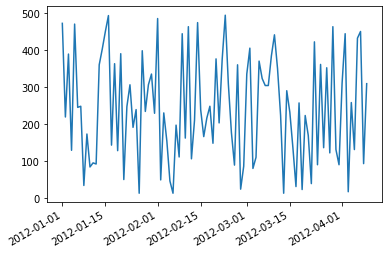

In [41]:
fig, axs = plt.subplots()


axs = sns.lineplot(x = ts.index, y = ts)
fig.autofmt_xdate()


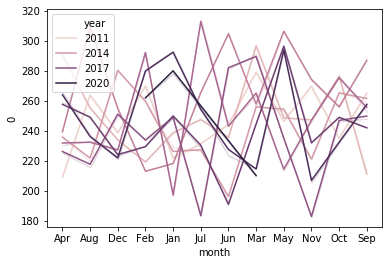

In [8]:
month_map = {1 : 'Jan', 2:'Feb', 3: 'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov', 12:'Dec'}
week_map = {1 : 'Monday', 2:'Tuesday', 3: 'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturfay',7:'Sunday'}

ts_df = pd.DataFrame(ts)
ts_df['month'] = ts.index.month
ts_df.month = ts_df.month.map(month_map)
ts_df['year'] = ts.index.year
ts_df['week'] = ts.index.week
ts_df.week = ts_df.week.map(week_map)

sns.lineplot(x = 'month', y = 0, hue = 'year',data = ts_df,ci = False)

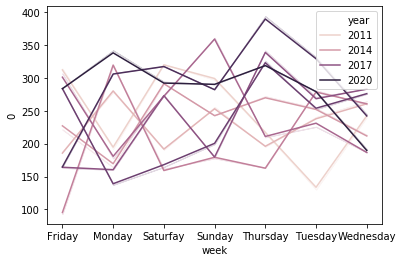

In [9]:



sns.lineplot(x = 'week', y = 0, hue = 'year',data = ts_df,ci = False)

In [81]:
import pyreadr

result = pyreadr.read_r('aus_airpassengers.rda')['aus_airpassengers']


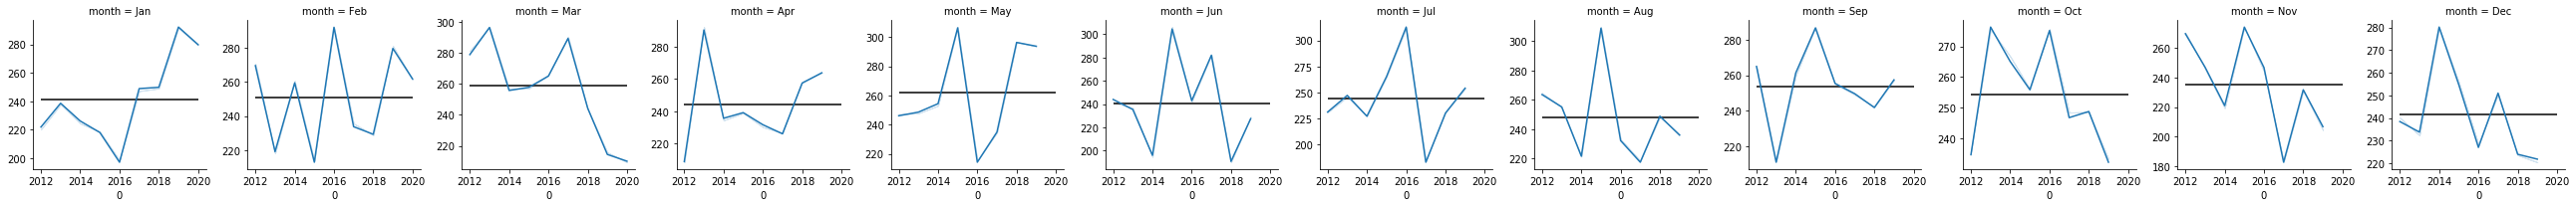

In [19]:
def plot_mena(x, **kwargs):
    
    plt.hlines(x.mean(), ts_df.year.min(), ts_df.year.max())
    


g = sns.FacetGrid(ts_df, col = 'month', sharex = True, sharey = False)
g.map(sns.lineplot, 'year', 0, ci = False)
g.map(plot_mena, 0)

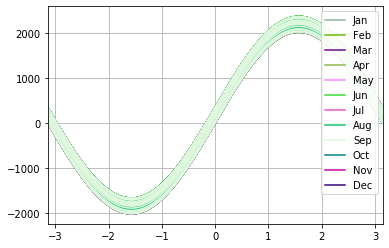

In [102]:
from pandas.plotting import andrews_curves
andrews_curves(ts_df, class_column = 'month')

In [73]:
from pandas.plotting import lag_plot

def create_lags(df: pd.DataFrame, lags = 1, fill_value = np.nan):
    for i in np.arange(1, lags + 1):
        ts_df[f'lag_{i }'] = np.append(ts_df[0][(i ):].values, [fill_value] * (i))
    
create_lags(ts_df, 9)


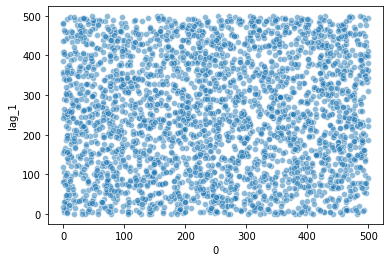

In [51]:
sns.scatterplot(x = 0, y = 'lag_1', data = ts_df,alpha = .5)

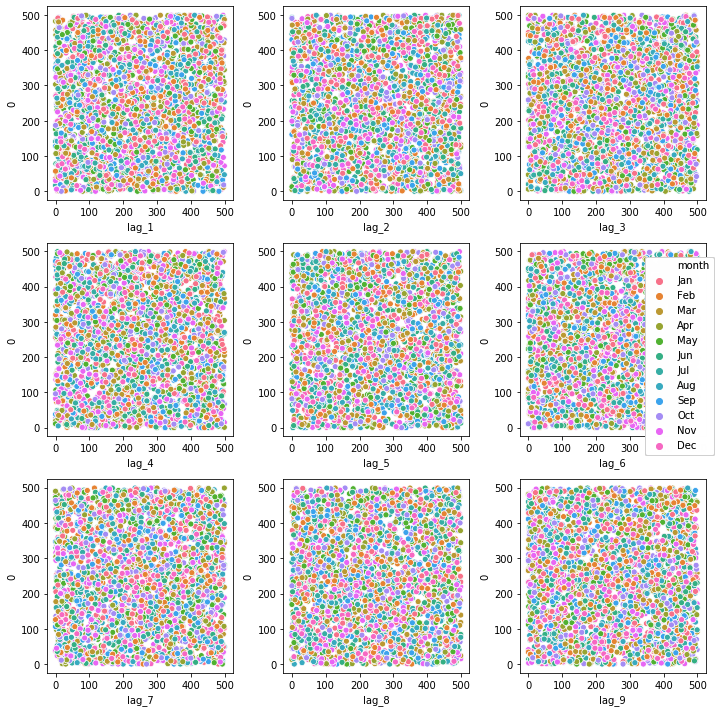

In [143]:
fig , axs = plt.subplots(3, 3, figsize = (10,10), tight_layout = True)
for i, axis in enumerate(axs.flat):
    sns.scatterplot(x = f'lag_{i + 1 }', y = 0, data = ts_df, ax = axis, hue = 'month')
    handles, labels = axis.get_legend_handles_labels()
    fig.legend(handles,labels,loc = 'right')
    axis.get_legend().remove()



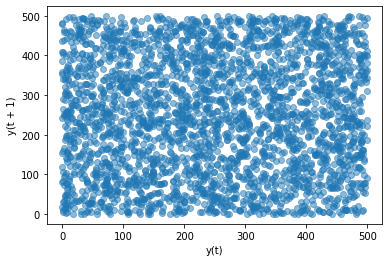

In [49]:
lag_plot(ts, alpha = .5)

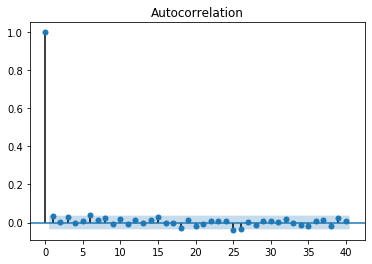

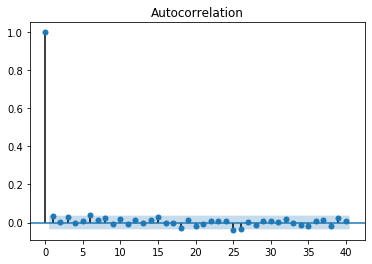

In [102]:
sm.graphics.tsa.plot_acf(ts_df[0], lags=40)

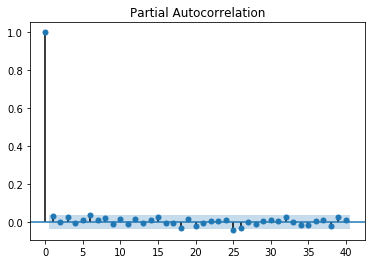

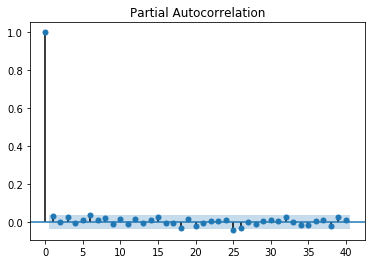

In [103]:
sm.graphics.tsa.plot_pacf(ts_df[0], lags=40)

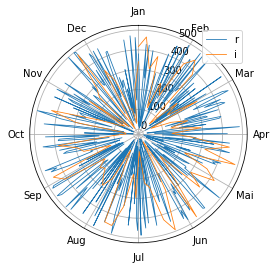

In [141]:
import matplotlib.dates as mdates



ax = plt.subplot(projection='polar')
ax.set_theta_direction(-1)
ax.set_theta_zero_location("N")
lines, labels = plt.thetagrids((0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330), labels=('Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), fmt=None)

for  year in [2012, 2020]:
    times = pd.date_range(ts_df[ts_df.index.year == year].index.min().to_pydatetime(), ts_df[ts_df.index.year == year].index.max().to_pydatetime())
    rand_nums = ts_df[ts_df.index.year == year][0].values
    df = pd.DataFrame(index=times, data=rand_nums, columns=['A'])
    t = mdates.date2num(df.index.to_pydatetime())
    y = df['A']
    tnorm = (t-t.min())/(t.max()-t.min())*2.*np.pi
    #ax.fill_between(tnorm,y ,0, alpha=0.4)
    ax.plot(tnorm,y , linewidth=0.8,  label = year)
    ax.legend('right')
plt.show()

In [138]:
ts_df.index.year

Int64Index([2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', length=3000)

In [ ]:
Das man den kompletten Produktzyklus mithilfe von Datenauswertungen unterstützt und damit ein vielfältiges Aufgabenspektrum hat. Von der Herstellungen des Produktes (Arbeit mit Daten aus dem Labor zum Beispiel Anomalieerkennung), zur Analyse von Daten um das Produkt optimal auf dem Markt zu platzieren (Schätzung von Preiselastizitäten, A/B-Tests usw.).